In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import json

In [22]:
business = []

with open('drive/Shared drives/MATH156 Project/Data/yelp_academic_dataset_business.json') as file:
  for line in file:
      business.append(json.loads(line))

business = pd.DataFrame(business)
business = business.dropna()

In [23]:
restaurants = business[business['categories'].str.contains("Restaurants")]

open_restaurants = restaurants[restaurants['is_open']==1].reset_index(drop = True)

open_restaurants.groupby(['city']).agg({'review_count':'sum', 
                         'business_id':'size'}).sort_values(by = 'review_count', ascending = False).head(5)
                         

,review_count,business_id
city,,
Austin,584233,2601
Portland,515699,2842
Atlanta,446299,2263
Boston,379893,1464
Orlando,357491,2263


In [24]:
restaurants_in_Portland = open_restaurants[open_restaurants['city'] == 'Portland'].reset_index(drop = True)
restaurants_in_Portland['review_count'].value_counts()

6       41
10      40
5       36
25      34
19      32
        ..
3199     1
1158     1
1194     1
1220     1
1737     1
Name: review_count, Length: 600, dtype: int64

## Data Overview

In [25]:
restaurants_in_Portland.rename({'stars': 'restaurant_rating'}, axis='columns', inplace = True)
restaurants_in_Portland['restaurant_rating'].value_counts().sort_index()

1.0      5
1.5     27
2.0     74
2.5    101
3.0    214
3.5    565
4.0    920
4.5    737
5.0    199
Name: restaurant_rating, dtype: int64

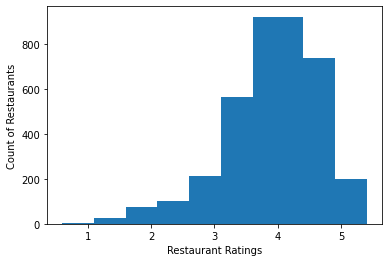

In [26]:
x = restaurants_in_Portland['restaurant_rating'].value_counts().sort_index().index
y = restaurants_in_Portland['restaurant_rating'].value_counts().sort_index().values
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xlabel('Restaurant Ratings')
plt.ylabel('Count of Restaurants')
plt.show()

In [27]:
restaurants_in_Portland['business_id'].nunique()

2842

In [28]:
reviews = pd.read_csv('drive/Shared drives/MATH156 Project/Data/yelp_review.csv')
print('Columns in review data', reviews.columns)

Columns in review data Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')


In [30]:
cols_to_keep = ['business_id', 'name', 'city', 'state', 'postal_code','latitude', 'longitude', 'restaurant_rating']
Portland_restaurants_reviews = pd.merge(restaurants_in_Portland[cols_to_keep], reviews, left_on = ['business_id']\
                                     , right_on = ['business_id'], how = 'left')

In [31]:
Portland_restaurants_reviews.head()

,business_id,name,city,state,postal_code,latitude,longitude,restaurant_rating,review_id,user_id,stars,date,text,useful,funny,cool
0,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,Portland,OR,97218,45.588906,-122.593331,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,Portland,OR,97230,45.526473,-122.535323,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5PsApTz-WqhF_-8mfqGtGw,Cafe Yumm!,Portland,OR,97204,45.518450,-122.675723,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aTAe3uMYBEwU0FbTMFEI5g,Urban Pantry,Portland,OR,97209,45.529939,-122.682932,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,r_sOAVfNPaXrpjznZpuxeg,Papi Chulo's,Portland,OR,97209,45.527419,-122.684447,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
